In [1]:
## Numerov's method to solve harmonic potential

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as lin


In [23]:
delta_x = 0.01
L = 6. 
N = 600 # No. of lattice points is 2N+1
x = np.linspace(-6.,6.+delta_x,N)
print(len(x))

600


In [7]:
def kronecker(i,j):
  if i == j :
    return 1
  else: 
    return 0

def V(x):
  potential = np.array([x[i]**2 for i in range(len(x))])
  return potential

# print(V(x))


I0 = np.identity(N)
I1 = np.zeros((N,N))
I2 = np.zeros((N,N))

for i in range(N):
  for j in range(N):
    if (j == i + 1) :
      I1[i,j] = 1
    else :
      I1[i,j] = 0

    if (j == i - 1):
      I2[i,j] = 1
    else :
      I2[i,j] = 0


A = (I1 - 2*I0 + I2)*(1/(delta_x**2))

B = (I1 + 10*I0 + I2)*(1/12)


# H = -np.dot(np.linalg.inv(B),A) + np.diag(potential)
# print(H)



In [8]:
H = -np.dot(np.linalg.inv(B),A) + np.diag(V(x))
print(H)

[[ 25505.54078445 -14695.40784447   1484.53766026 ...      0.
       0.              0.        ]
 [-14695.40784447  26989.83824571 -14845.37660261 ...      0.
       0.              0.        ]
 [  1484.53766026 -14845.37660261  27004.74877182 ...      0.
       0.              0.        ]
 ...
 [     0.              0.              0.         ...  27004.86806982
  -14845.37660261   1484.53766026]
 [     0.              0.              0.         ... -14845.37660261
   26989.95794471 -14695.40784447]
 [     0.              0.              0.         ...   1484.53766026
  -14695.40784447  25505.66088445]]


In [9]:
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)

H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
# print(H_eigenvalues)
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

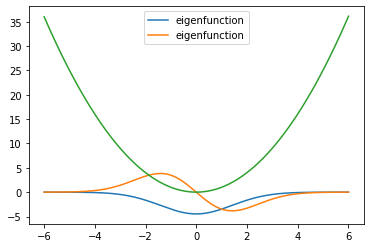

In [22]:
for i in range(0,2):
  psi = H_eigenvectors[:,i]
  # print(psi)
  plt.plot(x,50*psi,label = 'eigenfunction')
  # plt.plot(x,potential,label = 'Potential')
  plt.legend()

plt.plot(x,V(x),label = 'Potential')
  # plt.show()

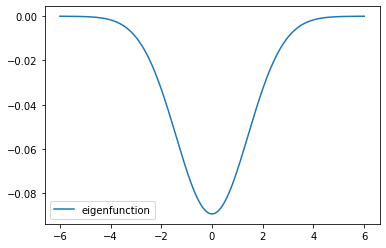

In [16]:
psi = H_eigenvectors[:,0] # Ground state wavefunction

plt.plot(x, psi, label="eigenfunction")
#plt.plot(x, potential, label="Potential")

plt.legend();

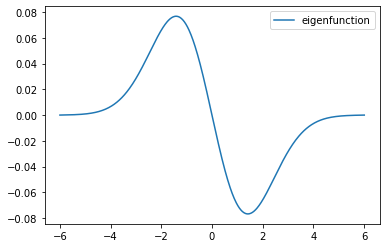

In [17]:
psi = H_eigenvectors[:,1] # Ground state wavefunction

plt.plot(x, psi, label="eigenfunction")
#plt.plot(x, potential, label="Potential")

plt.legend();